# Scalability test for mpi 

Create a csv file from the output log of the mpi scalability test run on the HPC cluster. The csv file will be used to plot the scalability graph.

In [11]:
import csv

# def name of file log and output data csv file
log_file = 'mandelbrot_scal_mpi_res.log'
csv_file = 'output_scal_mpi.csv'

# dictionary to store data
data = []
current_data = {}

# read log file and extract data
with open(log_file, 'r') as file:
    for line in file:
        if line.startswith('\tCommand being timed:'):
            if current_data:
                data.append(current_data)
                current_data = {}
            # # debug
            # print(line)
            np = line.split('mpirun -np ')[1].split()[0] # get number of processes
            # debug
            # print(np)
            # debug
            # print(type(current_data))
            current_data['MPI Processes'] = int(np)
        elif ':' in line:
            key, value = line.strip().split(':')
            key = key.strip()
            value = value.strip().split()[0] # to remove units and extra info if any
            current_data[key] = value

    # add last bloc of data if any
    if current_data:
        data.append(current_data)

# write data to csv file 

fieldnames = data[0].keys() # get the keys of the first element of the list

with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in data:
        writer.writerow(entry)

print('Data written to', csv_file)



Data written to output_scal_mpi.csv


Here there's a details of the most relevant data that can be extracted and can be used to interpret the scalability of the mpi application:

* User time (seconds): The total time spent in user mode during process execution. Includes time spent executing user-level code, excluding the operating system kernel.

* System time (seconds): The total time spent in system mode. This time includes work done by the kernel on behalf of the process, such as I/O operations.

* Percent of CPU this job got: Percentage of the CPU allocated to this process. A value above 100% indicates that the process has used more than one CPU core.

* Elapsed (wall clock) time (seconds): Time elapsed from start to finish of command execution as if measured by a stopwatch. This is the total execution time of the programme.

* Maximum resident set size (kbytes): The maximum amount of physical memory used by the process during execution.

* Major (requiring I/O) page faults: The number of page faults that required I/O operations. These are generally time-consuming as they involve loading data from disk.

* Minor (reclaiming a frame) page faults: The number of page faults that did not require I/O operations, indicating that the data was already available elsewhere in memory.

* Voluntary context switches: The number of times the process voluntarily gave up the CPU, typically to wait for a resource to become available.

* Involuntary context switches: The number of times the operating system has forced the process to hand over the CPU to another process.

So, it can be possible to analyze the scalability of the mpi application, obtaining the estimation of efficiency, identifying the bottlenecks and measuring the impact of the parallelization.

* **Efficiency**: Comparing user time, system time, and total execution time (wall clock time) for different configurations will help you understand how efficiently the programme is utilising system resources.

* **Bottlenecks**: A high number of major page faults, for example, may indicate bottlenecks related to I/O operations. Likewise, a high number of unintentional context switches may indicate excessive competition for processor resources.

* **Paralleling impact**: Increasing the CPU percentage and comparing execution times for different configurations of MPI and OpenMP processes can show the effectiveness of your parallelism.

## Analysis of the Efficiency

Here we will compare user time, system time, and total execution time (wall clock time) for different configurations. 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('output_scal_mpi.csv')

# filter data for each number of MPI processes
data_1 = data[data['MPI Processes'] == 1]
data_2 = data[data['MPI Processes'] == 2]
data_4 = data[data['MPI Processes'] == 4]
data_8 = data[data['MPI Processes'] == 8]
data_16 = data[data['MPI Processes'] == 16]
data_24 = data[data['MPI Processes'] == 24]
data_36 = data[data['MPI Processes'] == 36]
data_64 = data[data['MPI Processes'] == 48]



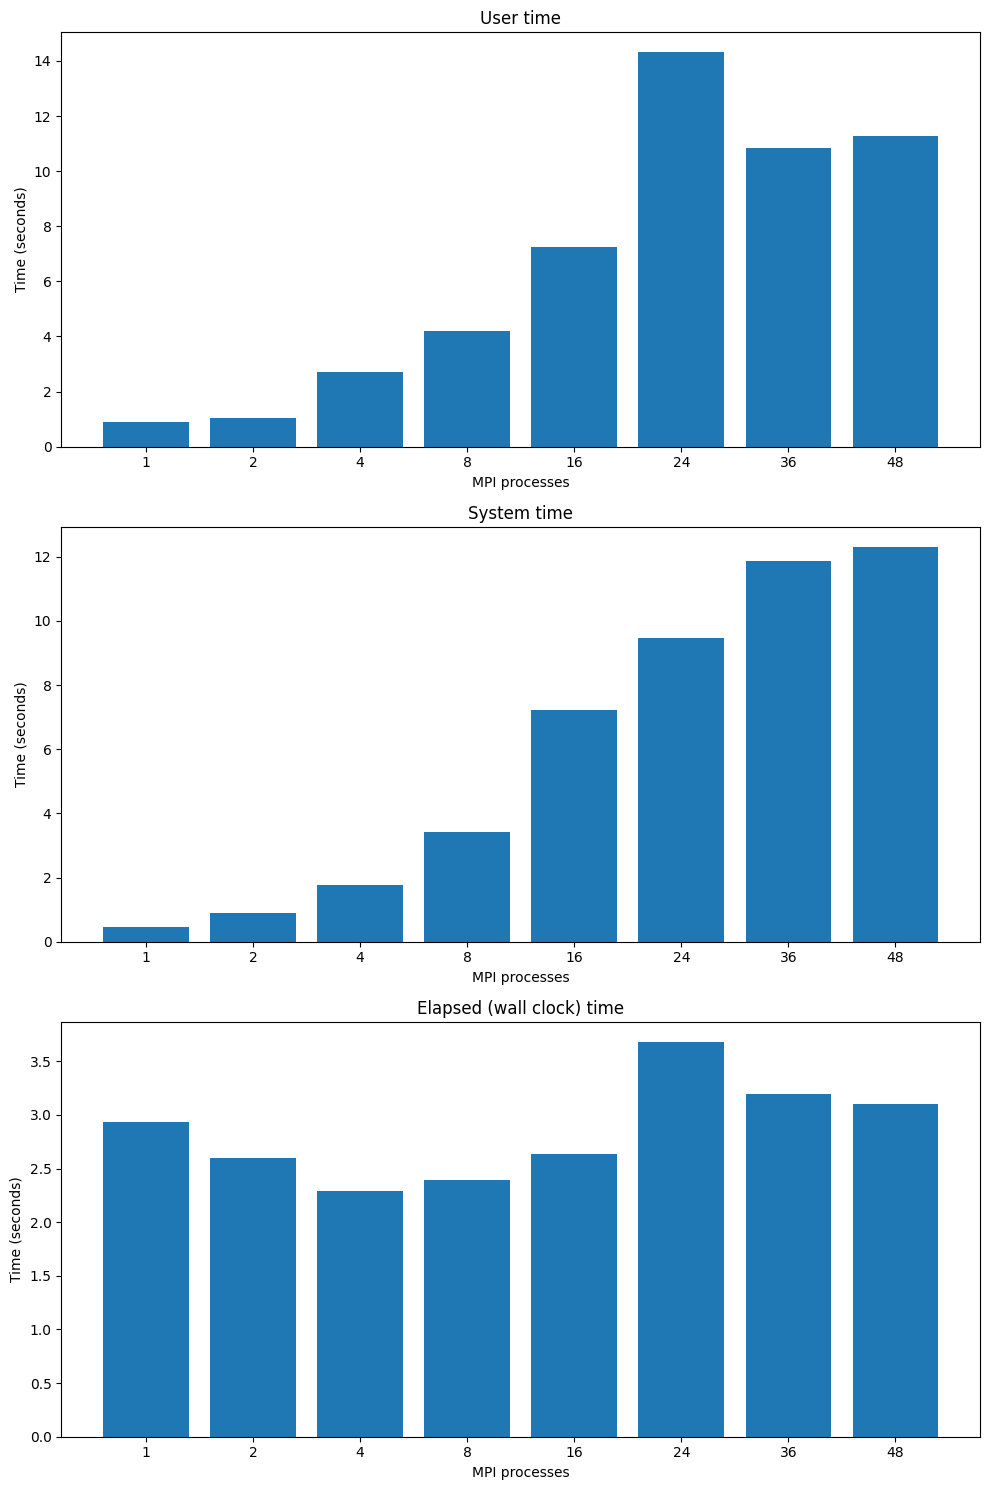

Plot saved to mandelbrot_scal_mpi.png


In [27]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['User time (seconds)'].mean(), data_2['User time (seconds)'].mean(), 
           data_4['User time (seconds)'].mean(), data_8['User time (seconds)'].mean(), 
           data_16['User time (seconds)'].mean(), data_24['User time (seconds)'].mean(), 
           data_36['User time (seconds)'].mean(), data_64['User time (seconds)'].mean()], 
          label='User time')
ax[0].set_title('User time')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Time (seconds)')

ax[1].bar(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['System time (seconds)'].mean(), data_2['System time (seconds)'].mean(), 
           data_4['System time (seconds)'].mean(), data_8['System time (seconds)'].mean(), 
           data_16['System time (seconds)'].mean(), data_24['System time (seconds)'].mean(), 
           data_36['System time (seconds)'].mean(), data_64['System time (seconds)'].mean()], 
          label='System time')
ax[1].set_title('System time')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Time (seconds)')

ax[2].bar(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_2['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_4['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_8['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_16['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_24['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_36['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_64['Elapsed (wall clock) time (hmmss or mss)'].mean()], 
          label='Elapsed (wall clock) time')
ax[2].set_title('Elapsed (wall clock) time')
ax[2].set_xlabel('MPI processes')
ax[2].set_ylabel('Time (seconds)')

plt.tight_layout()
# plt.savefig('mandelbrot_scal_mpi.png')
plt.show()

print('Plot saved to mandelbrot_scal_mpi.png')

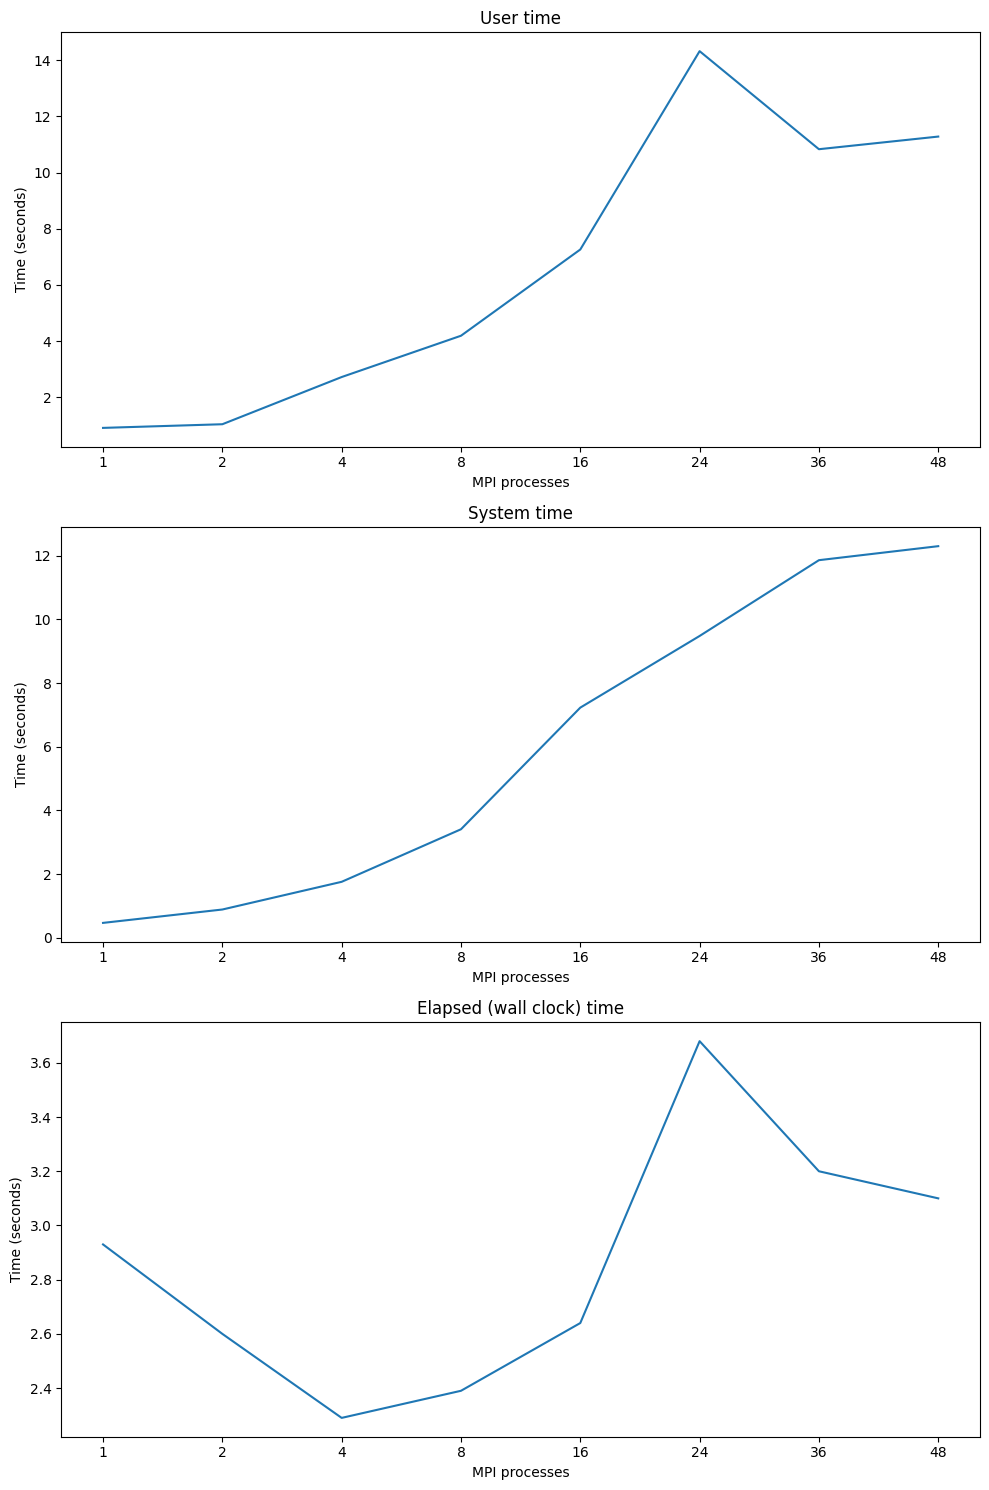

Plot saved to mandelbrot_scal_mpi.png


In [28]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['User time (seconds)'].mean(), data_2['User time (seconds)'].mean(), 
           data_4['User time (seconds)'].mean(), data_8['User time (seconds)'].mean(), 
           data_16['User time (seconds)'].mean(), data_24['User time (seconds)'].mean(), 
           data_36['User time (seconds)'].mean(), data_64['User time (seconds)'].mean()], 
          label='User time')
ax[0].set_title('User time')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Time (seconds)')

ax[1].plot(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['System time (seconds)'].mean(), data_2['System time (seconds)'].mean(), 
           data_4['System time (seconds)'].mean(), data_8['System time (seconds)'].mean(), 
           data_16['System time (seconds)'].mean(), data_24['System time (seconds)'].mean(), 
           data_36['System time (seconds)'].mean(), data_64['System time (seconds)'].mean()], 
          label='System time')
ax[1].set_title('System time')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Time (seconds)')

ax[2].plot(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_2['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_4['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_8['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_16['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_24['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_36['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_64['Elapsed (wall clock) time (hmmss or mss)'].mean()], 
          label='Elapsed (wall clock) time')
ax[2].set_title('Elapsed (wall clock) time')
ax[2].set_xlabel('MPI processes')
ax[2].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.savefig('mandelbrot_scal_mpi.png')
plt.show()

print('Plot saved to mandelbrot_scal_mpi.png')

## Bottlenecks

Here we will analyse the major page faults and involuntary context swithces for different configurations.


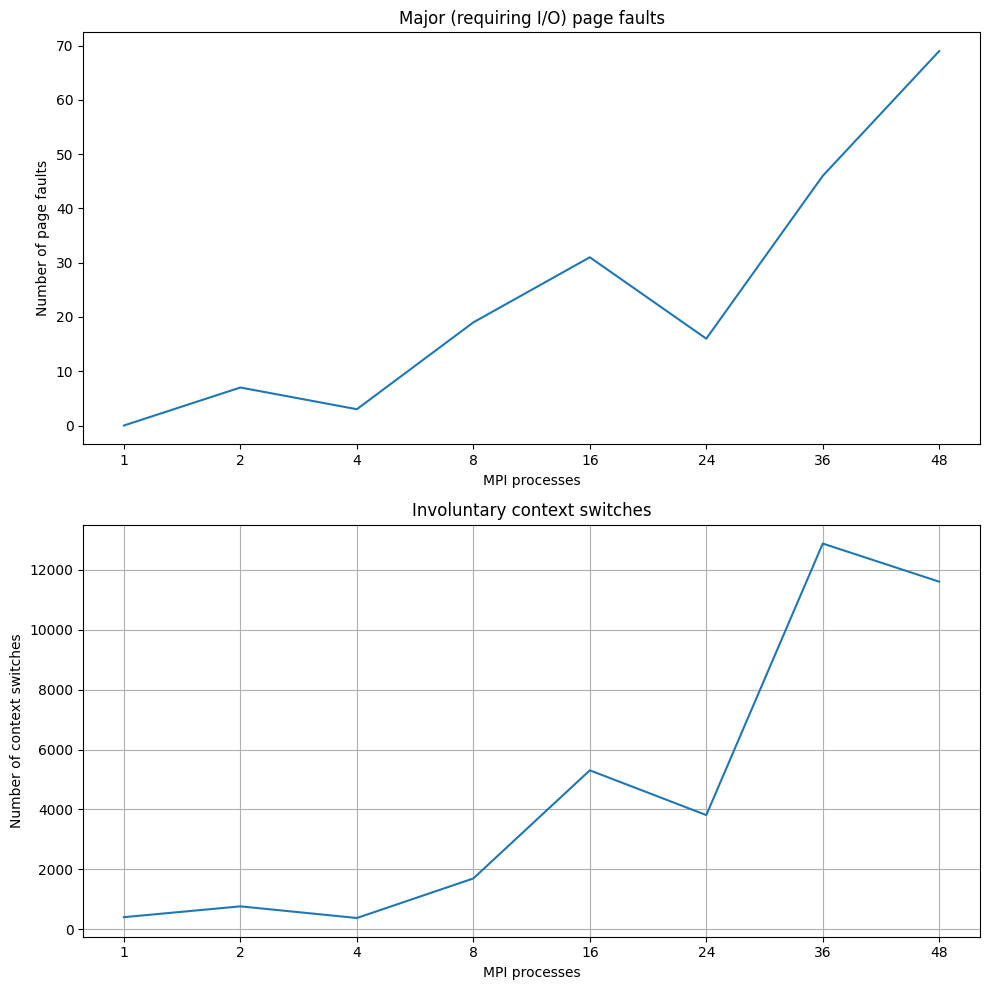

In [36]:
# plot the data for bottlenecks ("Major (requiring I/O) page faults", "Involuntary context switches")

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
              [data_1['Major (requiring I/O) page faults'].mean(), data_2['Major (requiring I/O) page faults'].mean(),
                data_4['Major (requiring I/O) page faults'].mean(), data_8['Major (requiring I/O) page faults'].mean(),
                data_16['Major (requiring I/O) page faults'].mean(), data_24['Major (requiring I/O) page faults'].mean(),
                data_36['Major (requiring I/O) page faults'].mean(), data_64['Major (requiring I/O) page faults'].mean()],
              label='Major (requiring I/O) page faults')
ax[0].set_title('Major (requiring I/O) page faults')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Number of page faults')

ax[1].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
                [data_1['Involuntary context switches'].mean(), data_2['Involuntary context switches'].mean(),
                    data_4['Involuntary context switches'].mean(), data_8['Involuntary context switches'].mean(),
                    data_16['Involuntary context switches'].mean(), data_24['Involuntary context switches'].mean(),
                    data_36['Involuntary context switches'].mean(), data_64['Involuntary context switches'].mean()],
                label='Involuntary context switches')
ax[1].set_title('Involuntary context switches')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Number of context switches')

plt.tight_layout()
# plt.savefig('mandelbrot_scal_mpi_bottlenecks.png')
plt.grid(True)
plt.show()


# Parallelization Impact

Here we will compare the increasing of the CPU percentage and the execution times for different configurations of MPI processes.

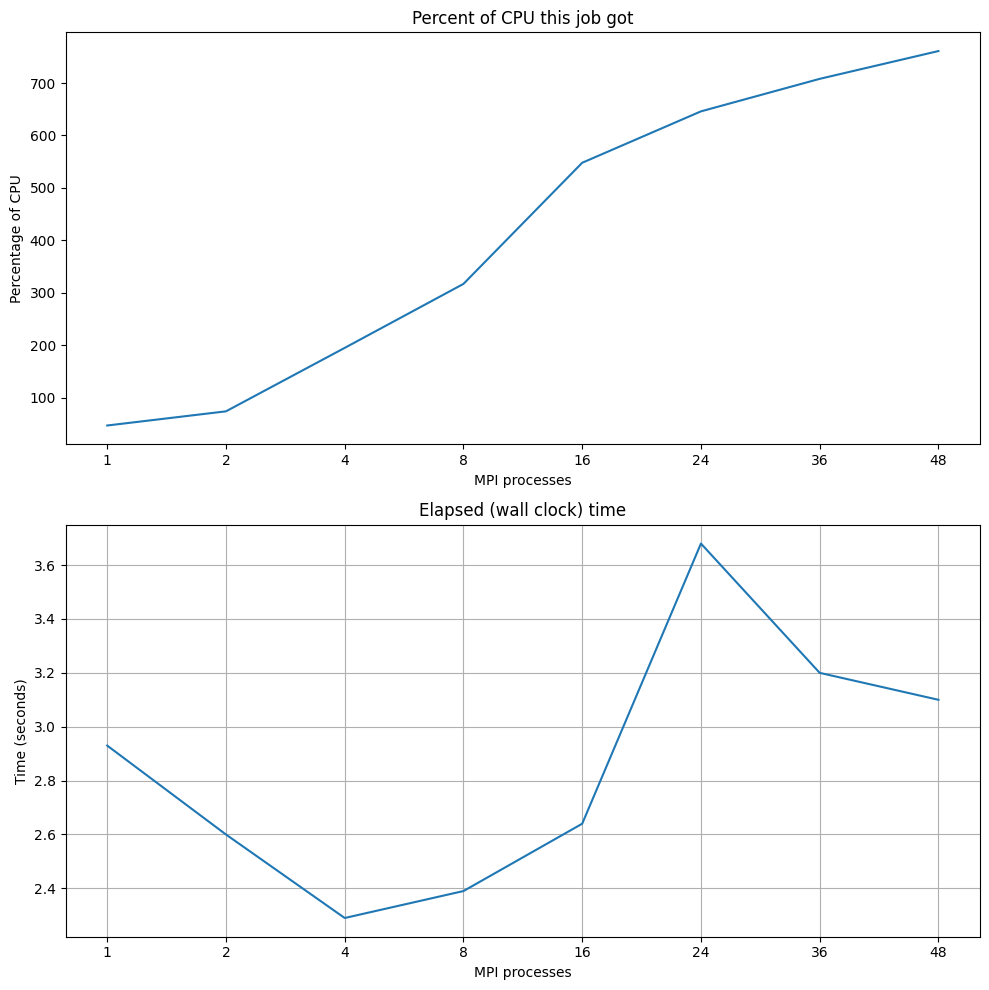

In [42]:
# plot the data for increasing of the CPU percentage ("Percent of CPU this job got") and the execution times ("Elapsed (wall clock) time (hmmss or mss)")


fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
                [data_1['Percent of CPU this job got'].mean(), data_2['Percent of CPU this job got'].mean(),
                    data_4['Percent of CPU this job got'].mean(), data_8['Percent of CPU this job got'].mean(),
                    data_16['Percent of CPU this job got'].mean(), data_24['Percent of CPU this job got'].mean(),
                    data_36['Percent of CPU this job got'].mean(), data_64['Percent of CPU this job got'].mean()],
                label='Percent of CPU this job got')
ax[0].set_title('Percent of CPU this job got')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Percentage of CPU')

ax[1].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
                [data_1['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_2['Elapsed (wall clock) time (hmmss or mss)'].mean(),
                    data_4['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_8['Elapsed (wall clock) time (hmmss or mss)'].mean(),
                    data_16['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_24['Elapsed (wall clock) time (hmmss or mss)'].mean(),
                    data_36['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_64['Elapsed (wall clock) time (hmmss or mss)'].mean()],
                label='Elapsed (wall clock) time')
ax[1].set_title('Elapsed (wall clock) time')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Time (seconds)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('mandelbrot_scal_mpi_CPU_percentage.png')
plt.show()
